In [37]:
import pandas as pd
train=pd.read_excel('C:/Users/ugad.ingenieria2/Documents/UGAD/MODELOS/Base_Oxigeno.xlsx',sheet_name='Hoja1')

In [38]:
train.shape

(89329, 8)

In [39]:
train.describe()


,HospGral N° Cama Ocupadas,UCIN N° Cama Ocupadas,UCI N° Cama Ocupadas,Consumo Real al Corte 02,Consumo Estimado Teórico 02,CV
count,89329.000000,89329.000000,89329.000000,8.932900e+04,8.932900e+04,89329.000000
mean,29.455294,1.529201,5.743600,6.208304e+02,2.309963e+05,99.882901
std,117.118086,6.127628,16.059985,5.403022e+03,1.952821e+06,50.305169
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,1.000000e+01,0.000000e+00,68.180541
50%,3.000000,0.000000,0.000000,1.279200e+02,4.000000e+02,125.597988
75%,14.000000,0.000000,5.000000,4.620000e+02,5.895000e+03,141.414550
max,1743.000000,121.000000,196.000000,1.005744e+06,4.557074e+07,141.421356


In [40]:
train.columns

Index(['Red Asistencial/Prestacional', 'IPRESS', 'HospGral N° Cama Ocupadas',
       'UCIN N° Cama Ocupadas', 'UCI N° Cama Ocupadas',
       'Consumo Real al Corte 02', 'Consumo Estimado Teórico 02', 'CV'],
      dtype='object')

In [41]:
train=train[train['Red Asistencial/Prestacional']=='REBAGLIATI']
train=train[train['CV']<=40]
train=train[train['Consumo Real al Corte 02']!=0]
train=train[train['Consumo Estimado Teórico 02']!=0]
train=train[train['Consumo Real al Corte 02']<=2000]
train=train[train['Consumo Estimado Teórico 02']<=2000]


In [42]:
train.describe()

,HospGral N° Cama Ocupadas,UCIN N° Cama Ocupadas,UCI N° Cama Ocupadas,Consumo Real al Corte 02,Consumo Estimado Teórico 02,CV
count,519.000000,519.000000,519.000000,519.000000,519.000000,519.000000
mean,1.832370,0.805395,0.947977,188.503988,204.421965,18.947354
std,1.761019,1.161932,1.022522,178.243817,211.475678,11.431967
min,0.000000,0.000000,0.000000,10.000000,15.000000,0.000000
25%,0.000000,0.000000,0.000000,79.000000,60.000000,9.753197
50%,2.000000,0.000000,1.000000,147.000000,135.000000,18.696383
75%,3.000000,2.000000,1.000000,292.500000,262.500000,28.329490
max,11.000000,5.000000,5.000000,1372.300000,1815.000000,39.990533


In [43]:
train.shape

(519, 8)

In [44]:
df_num = train.select_dtypes(include=['float64', 'int64'])


In [45]:
df_num.columns

Index(['HospGral N° Cama Ocupadas', 'UCIN N° Cama Ocupadas',
       'UCI N° Cama Ocupadas', 'Consumo Real al Corte 02',
       'Consumo Estimado Teórico 02', 'CV'],
      dtype='object')

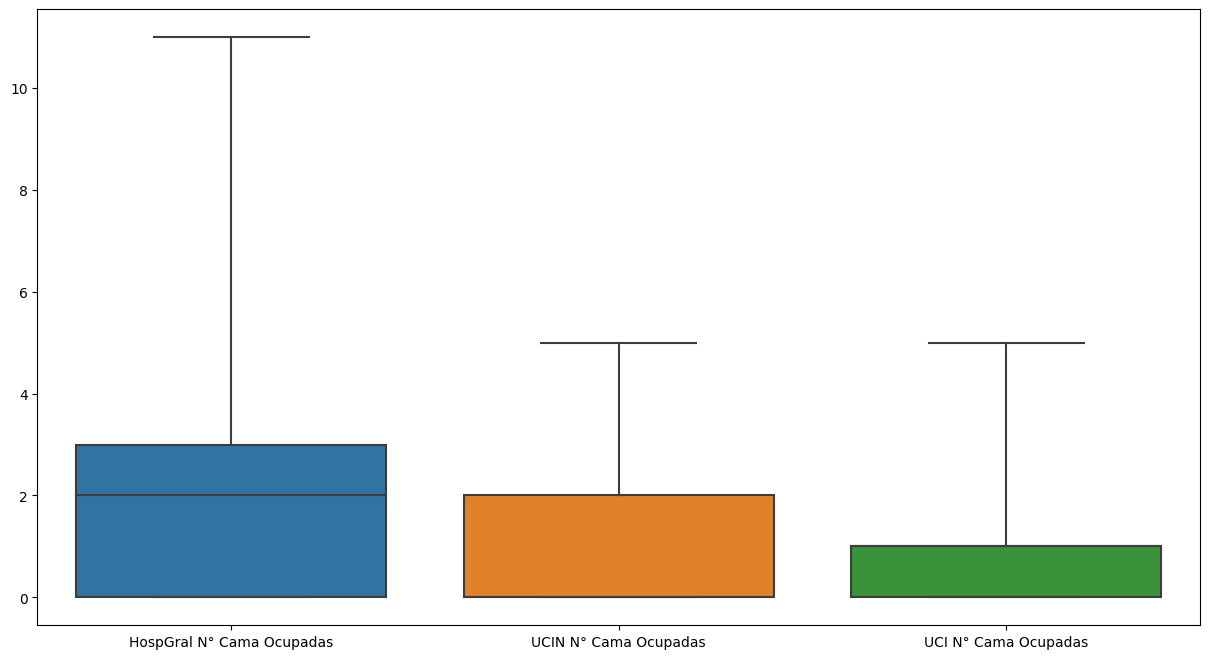

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# GRÁFICA DE CAJAS
plt.figure(figsize=(15,8))
sns.boxplot(data=df_num[['HospGral N° Cama Ocupadas', 
       'UCIN N° Cama Ocupadas', 'UCI N° Cama Ocupadas']], whis=10)
plt.show()

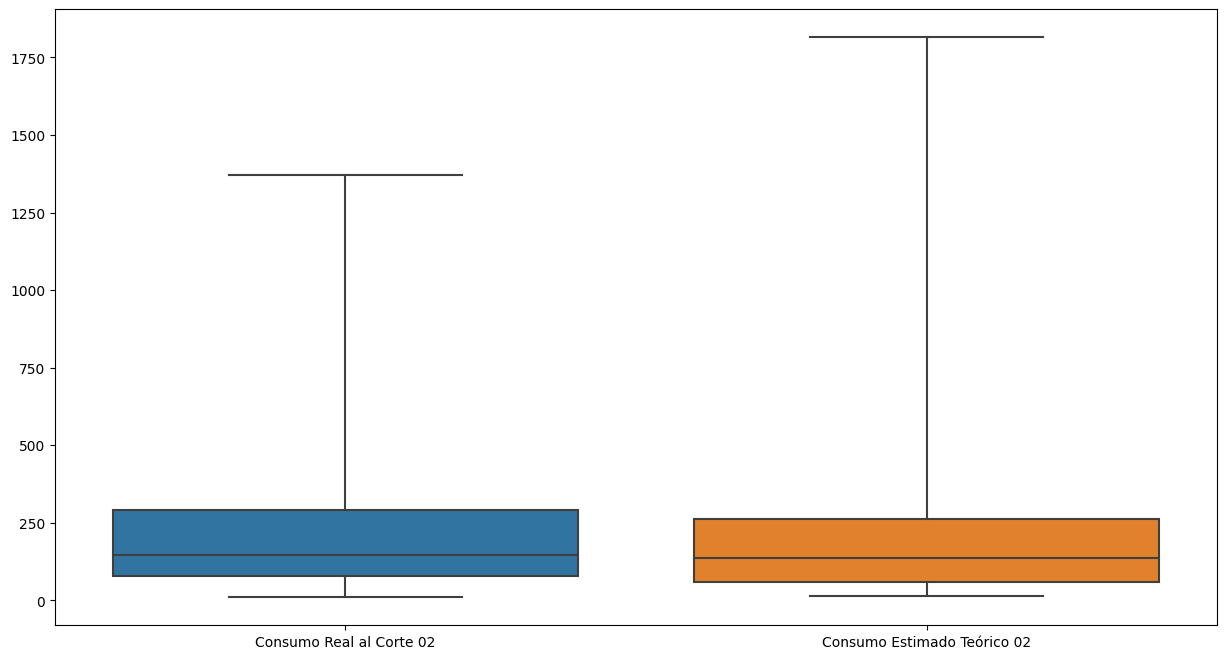

In [47]:
import matplotlib.pyplot as plt



plt.figure(figsize=(15,8))
sns.boxplot(data=df_num[['Consumo Real al Corte 02',
       'Consumo Estimado Teórico 02']], whis=10)
plt.show()

In [48]:
train.shape

(519, 8)

In [49]:
import numpy as np
import pandas as pd

def remove_outliers(df, column, threshold=95):
    lower_bound = np.percentile(df[column], (100 - threshold) / 2)
    upper_bound = np.percentile(df[column], threshold + (100 - threshold) / 2)
    return df[(df[column] > lower_bound) & (df[column] < upper_bound)]

train = remove_outliers(train, 'Consumo Real al Corte 02', threshold=95)
train = remove_outliers(train, 'Consumo Estimado Teórico 02', threshold=95)

In [50]:
train.shape

(456, 8)

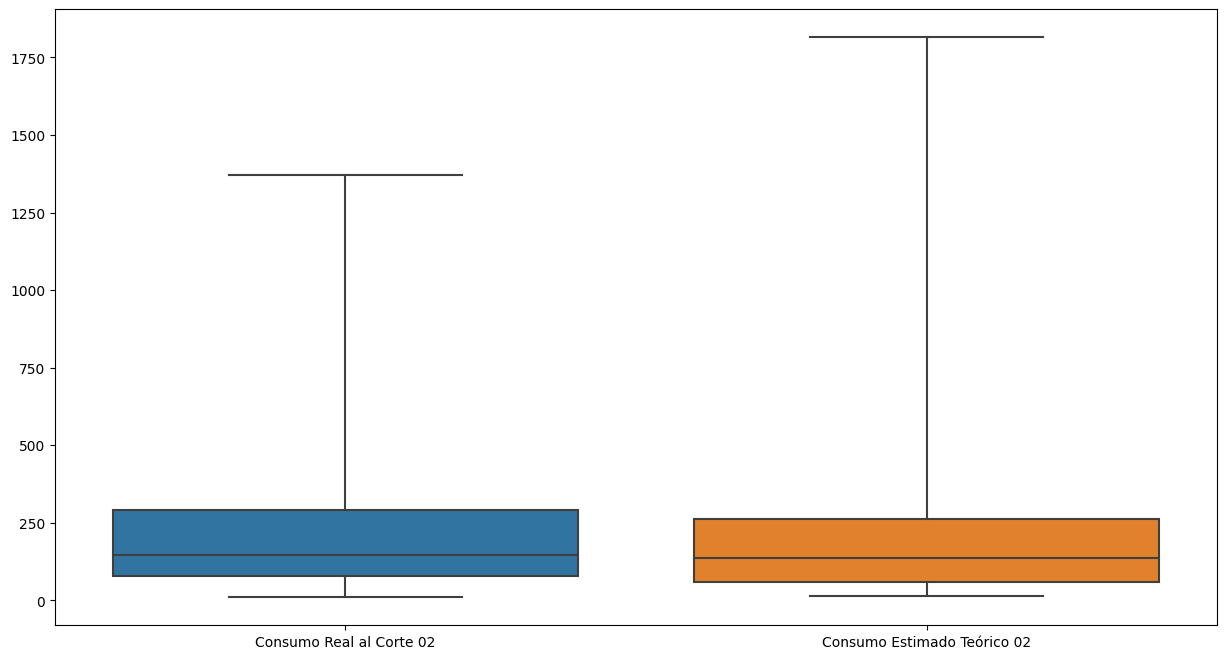

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_num[['Consumo Real al Corte 02',
       'Consumo Estimado Teórico 02']], whis=10)
plt.show()

In [52]:
train.shape

(456, 8)

In [53]:
#VIENDO  NULOS
missing_values_count = train.isnull().sum() 
print(missing_values_count)

print("Valores faltantes: ", train.isna().sum().sum())


Red Asistencial/Prestacional    0
IPRESS                          0
HospGral N° Cama Ocupadas       0
UCIN N° Cama Ocupadas           0
UCI N° Cama Ocupadas            0
Consumo Real al Corte 02        0
Consumo Estimado Teórico 02     0
CV                              0
dtype: int64
Valores faltantes:  0


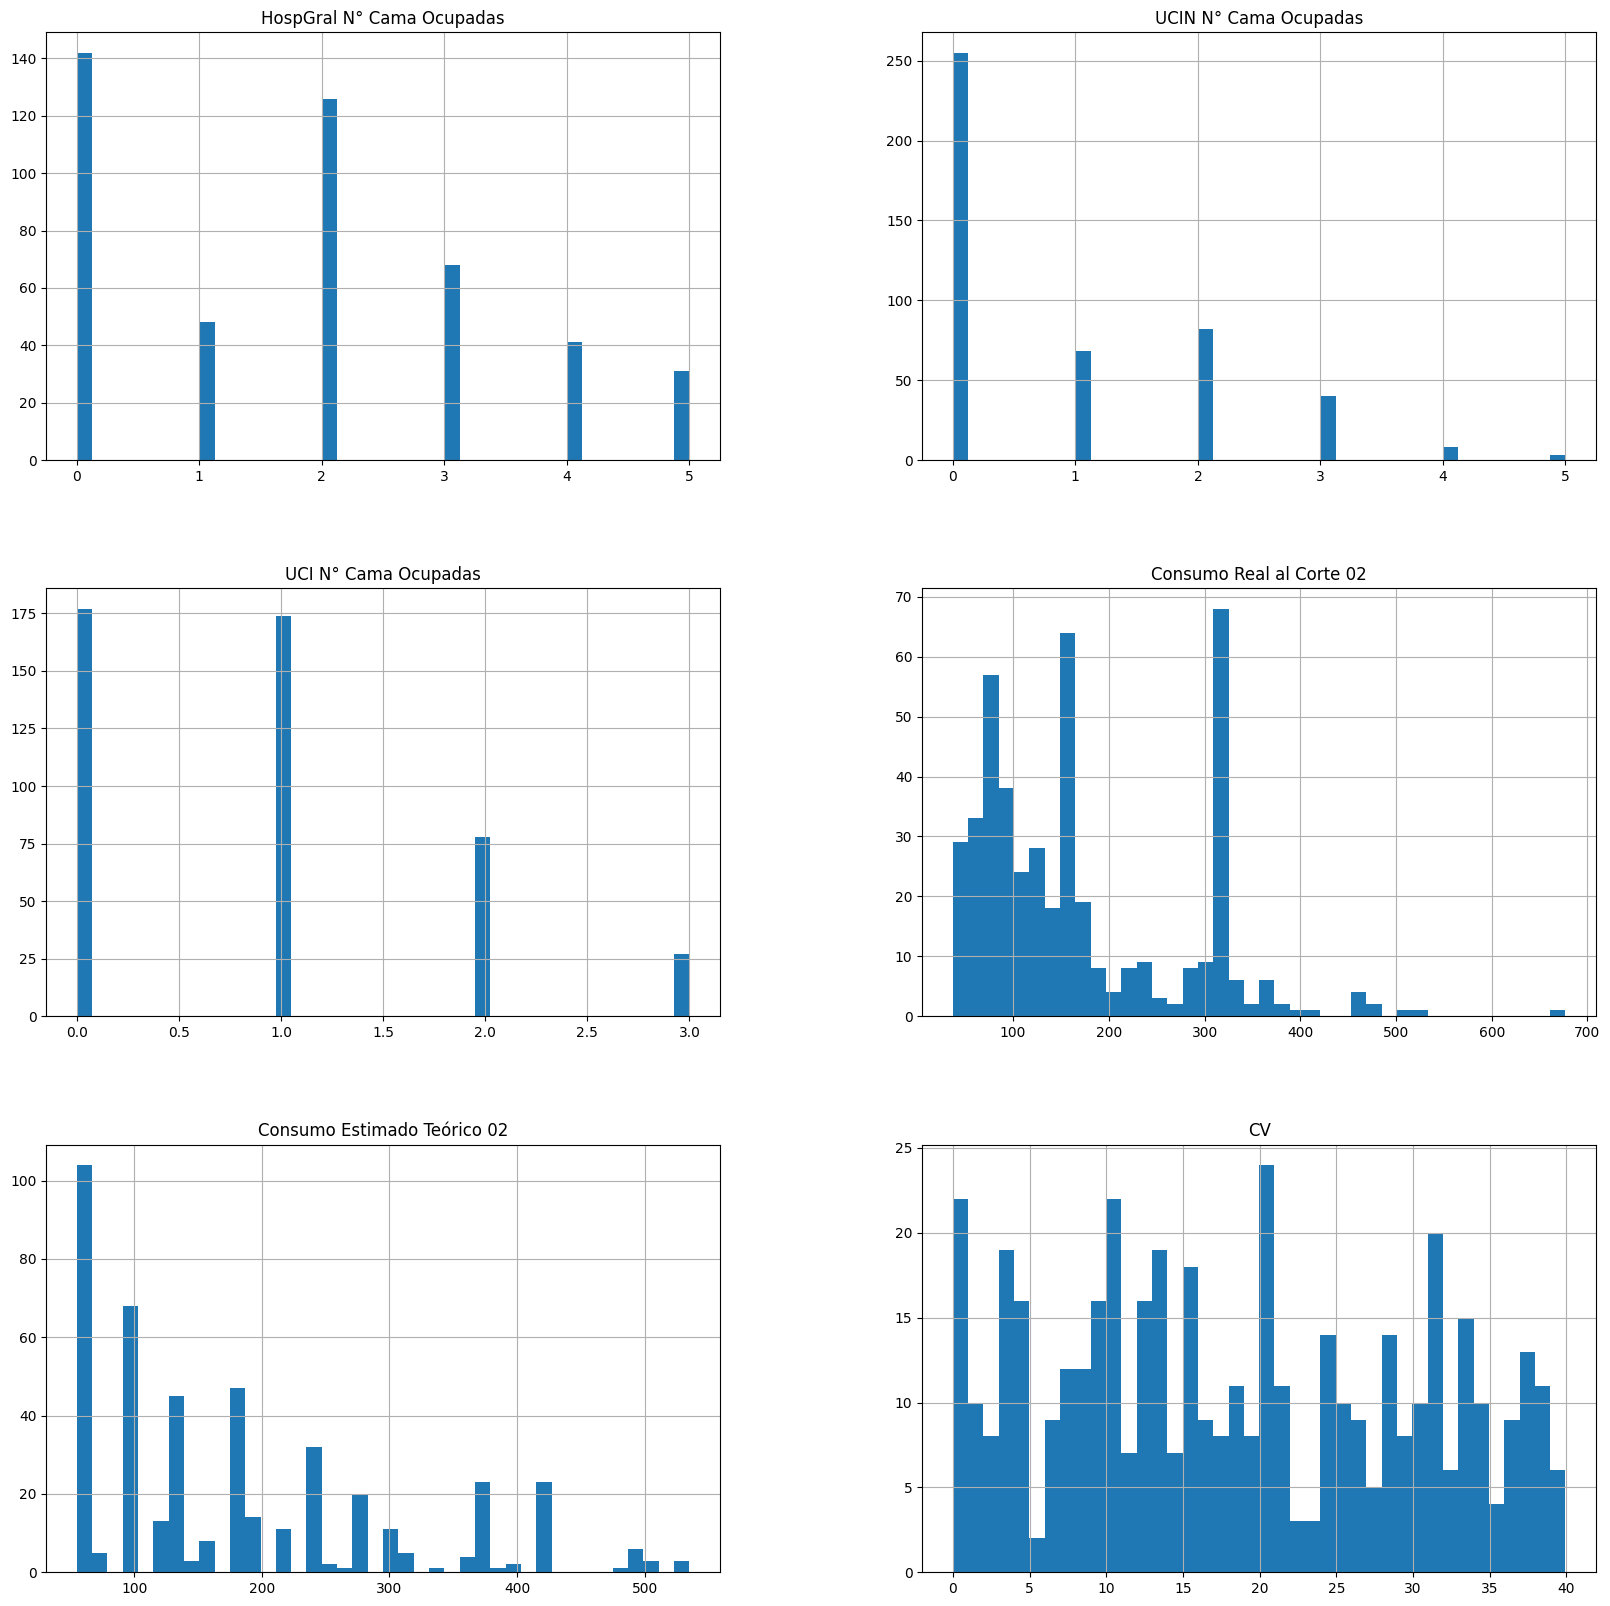

In [54]:
import matplotlib.pyplot as plt
train.hist(bins=40, figsize=(20,20))
plt.show()
#PODEMOS VER QUE LA GRÁFICA DEL PRECIO, TIENE UNA DISTRIBUCIÓN QUE DETALLAREMOS MÁS ADELANTE

C:\Users\ugad.ingenieria2\AppData\Local\Temp\ipykernel_11804\1853135831.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(train["Consumo Real al Corte 02"])


Text(0.5, 1.0, 'Consumo Real al Corte 02')

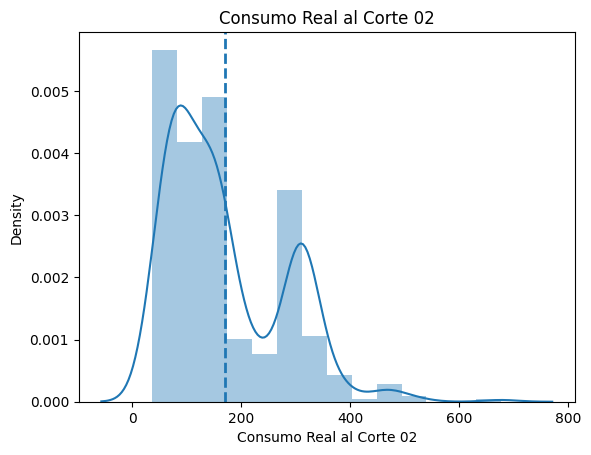

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
ax=sns.distplot(train["Consumo Real al Corte 02"])
ax.axvline(train["Consumo Real al Corte 02"].mean(), linestyle='--', linewidth=2)
plt.title('Consumo Real al Corte 02')

In [56]:
value_counts = train['Consumo Real al Corte 02'].value_counts() 

a=pd.DataFrame(value_counts)

a=a.reset_index()

a['index'].min()

37.0

In [57]:
train["Consumo Real al Corte 02"].min()

37.0

FALTA CDF, lo que hice ya incluye pdf y kde

C:\Users\ugad.ingenieria2\AppData\Local\Temp\ipykernel_11804\43108056.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion=correlacion.corr().round(2)


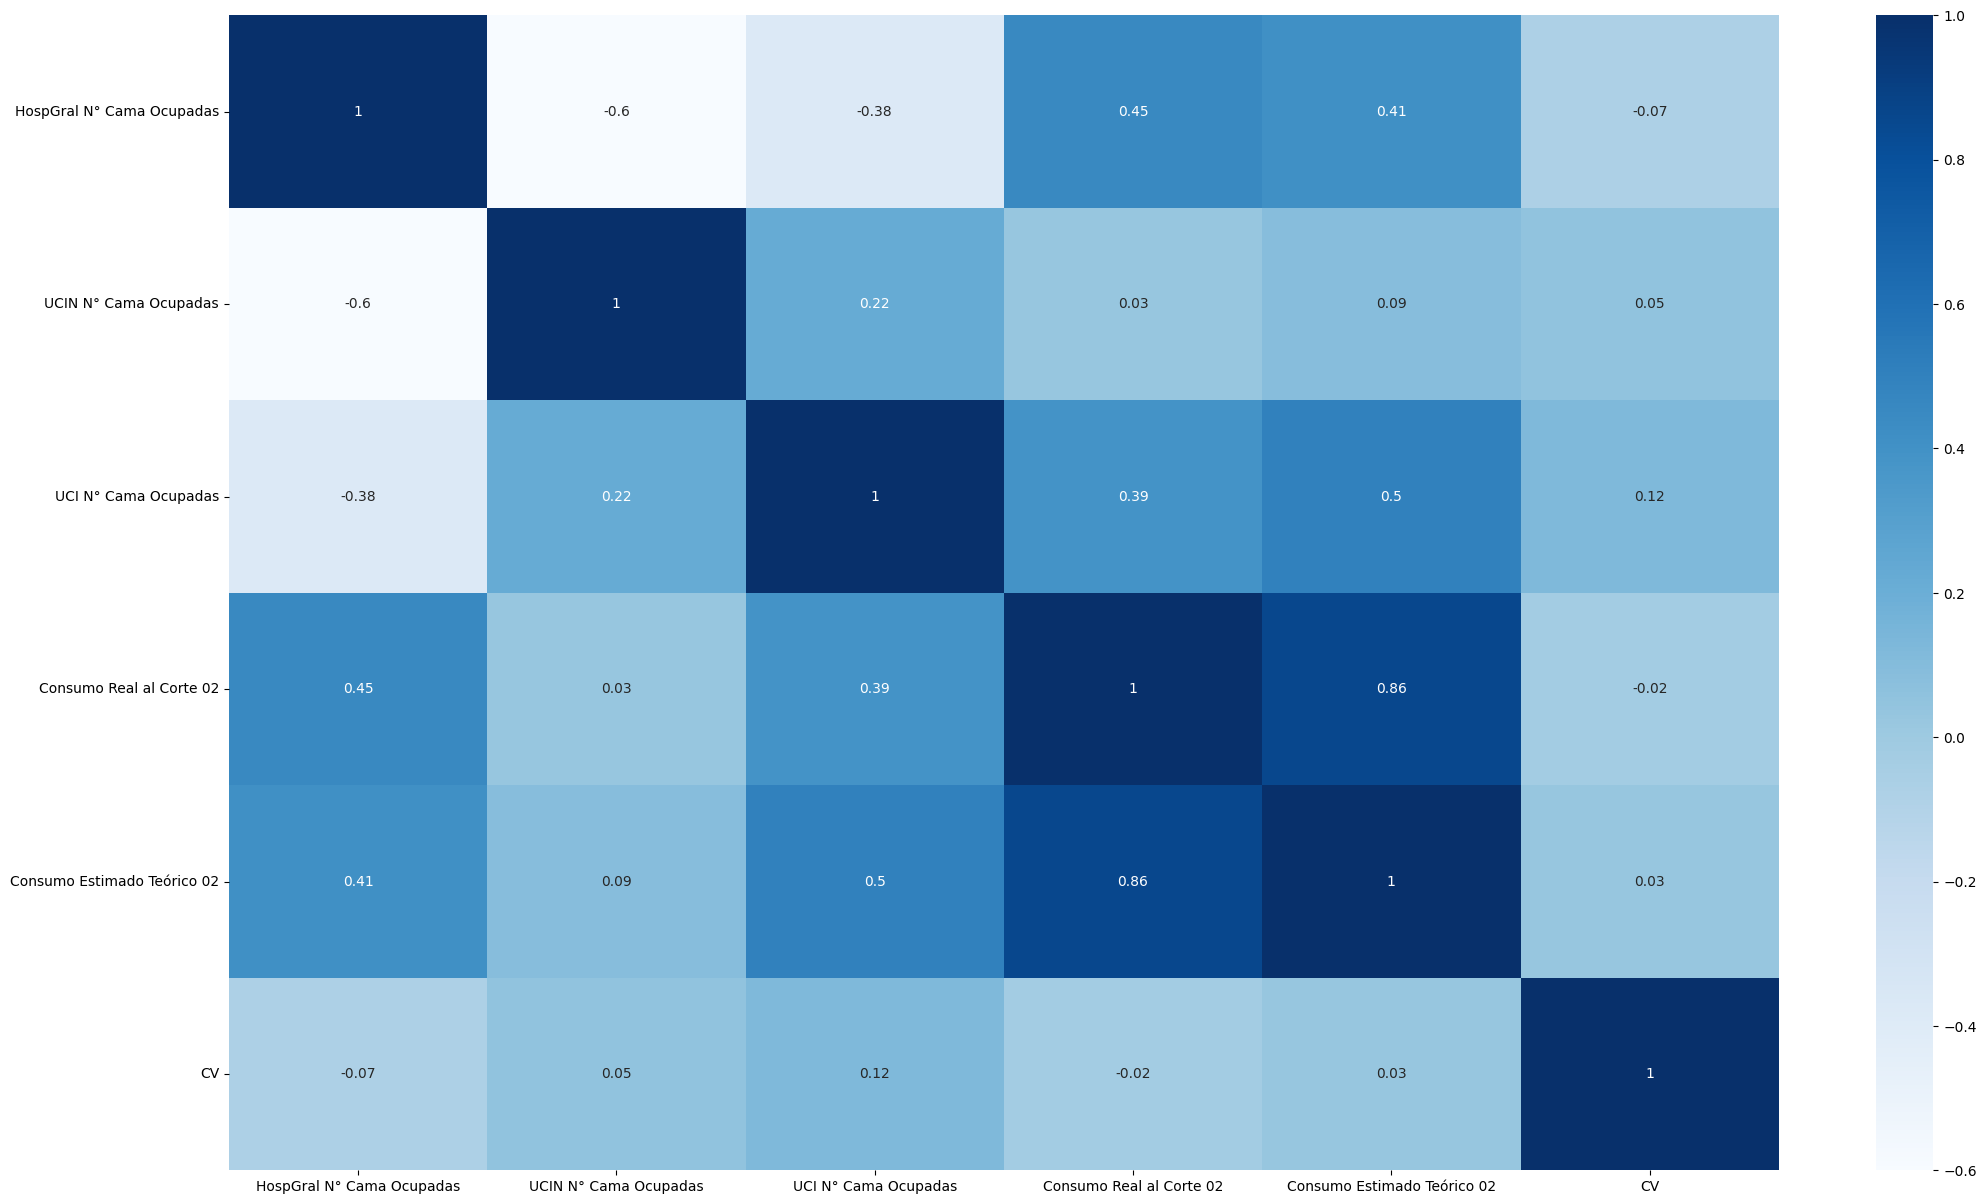

In [58]:

import seaborn as sns
correlacion = train
correlacion=correlacion.corr().round(2)
fig, ax = plt.subplots(figsize=(25,15))
ax=sns.heatmap(correlacion, annot=True,cmap="Blues")



In [59]:
train.columns

Index(['Red Asistencial/Prestacional', 'IPRESS', 'HospGral N° Cama Ocupadas',
       'UCIN N° Cama Ocupadas', 'UCI N° Cama Ocupadas',
       'Consumo Real al Corte 02', 'Consumo Estimado Teórico 02', 'CV'],
      dtype='object')

#### ESTABLECEMOS LAS VARIABLES

In [60]:
#ELIMINAMOS LAS VARIABLES QUE NO TIENEN USO
train=train.drop(["Red Asistencial/Prestacional", 'IPRESS'],axis=1)

In [61]:

#ESTABLECEMOS LA VARIABLE OBJETIVO Y LAS VARIABLES DEPENDIENTES
y=train["Consumo Real al Corte 02"]
X=train.drop("Consumo Real al Corte 02", axis=1)

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456 entries, 9664 to 16531
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   HospGral N° Cama Ocupadas    456 non-null    int64  
 1   UCIN N° Cama Ocupadas        456 non-null    int64  
 2   UCI N° Cama Ocupadas         456 non-null    int64  
 3   Consumo Real al Corte 02     456 non-null    float64
 4   Consumo Estimado Teórico 02  456 non-null    int64  
 5   CV                           456 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 24.9 KB


## **ANÁLISIS DE SELECCIÓN DE CARACTERISTICAS**

#### **SELECCIONANDO VARIABLES POR CORRELACIÓN**

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
RMSE_ANTES = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE ANTES DE LA SELECCIÓN POR CORRELACIÓN: "+str(RMSE_ANTES))


#APLICAMOS NUEVAMENTE EL MODELO

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
RMSE_CORRELA = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DE LA SELECCIÓN POR CORRELACIÓN: "+str(RMSE_CORRELA))

RMSE ANTES DE LA SELECCIÓN POR CORRELACIÓN: 53.25362218012787
RMSE DESPUES DE LA SELECCIÓN POR CORRELACIÓN: 53.25362218012787


#### **SELECCIONANDO VARIABLES CON RFE**

In [63]:

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CREAMOS UN OBJETO DE REGRESIÓN LINEAL
modelo = LinearRegression()

Lista_RMSE = []
Posicion_RMSE = []
elementos=len(X.columns)


#COMENZAREMOS A ITERAR PARA VER CON QUE CANTIDAD DE VARIABLES SE TIENE EL MENOR RMSE
for i in range(elementos):
    # CREAMOS UN OBJETO RFE PARA SELECCIONAR n CARACTERÍSTICAS
    rfe = RFE(modelo,n_features_to_select=i+1)

    # AJUSTAMOS EL MODELO RFE AL CONJUNTO DE DATOS
    X_rfe = rfe.fit_transform(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_rfe, y,test_size=0.3,random_state=42)

    #ENTRENAMOS EL NUEVO MODELO
    modelo.fit(X_train, y_train)

    y_pred = modelo.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    Lista_RMSE.append(rmse)
    print("Con "+str(i+1)+" variables se obtiene un RMSE de "+str(rmse))
    extra=i+1
    Posicion_RMSE.append(extra)

posicion=pd.Series(Lista_RMSE).idxmin()
RMSE_RFE=min(Lista_RMSE)
cant_var_usar=Posicion_RMSE[posicion]

#ESTA VEZ APLCIAREMOS OTRA VEZ RFE PERO PARA PODER EXTRAER LAS VARIABLES A FILTRAR
rfe = RFE(modelo,n_features_to_select=cant_var_usar)
X_rfe = rfe.fit_transform(X, y)
cabeceras_nuevas=X.columns[(rfe.get_support())]

X=X[cabeceras_nuevas]

#APLICAMOS EL MODELO 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
ACC_NUEVO = np.sqrt(mean_squared_error(y_test, y_pred))
print("LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE: ",cant_var_usar)

print("VARIABLES SELECCIONADAS POR RFE: ",cabeceras_nuevas)
print("RMSE DESPUES DEL RFE: "+str(ACC_NUEVO))

Con 1 variables se obtiene un RMSE de 95.6765009637145
Con 2 variables se obtiene un RMSE de 67.47910667769492
Con 3 variables se obtiene un RMSE de 56.21903110166162
Con 4 variables se obtiene un RMSE de 53.2292588359298
Con 5 variables se obtiene un RMSE de 53.25362218012785
LA CANTIDAD DE VARIABLES IDEAL A USAR SERÁ DE:  4
VARIABLES SELECCIONADAS POR RFE:  Index(['HospGral N° Cama Ocupadas', 'UCIN N° Cama Ocupadas',
       'UCI N° Cama Ocupadas', 'Consumo Estimado Teórico 02'],
      dtype='object')
RMSE DESPUES DEL RFE: 53.2292588359298


#### **SELECCIONANDO VARIABLES CON LASSO REGRESION**

In [64]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#utilizar LassoCV para seleccionar variables
reg = LassoCV(cv=5)
reg.fit(X_train, y_train)

coef = pd.Series(reg.coef_, index = X_train.columns)
LASSO_VARS=coef[coef!=0].index.tolist()

print("VARIABLES SELECCIONADAS POR LASSO REGRESIÓN: ",LASSO_VARS)

# Usar solo las variables seleccionadas para entrenar el modelo y de esta forma para no asignar aún al X original porque el RMSE puede subir
X_train, X_test, y_train, y_test = train_test_split(X[LASSO_VARS], y, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión lineal
reg = LinearRegression()
reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular el RMSE y el MAE de la regresión lineal
LASSO_RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

print("RMSE DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN: ", LASSO_RMSE)


#ESTABLECEMOS LAS VARIABLES FINALES A USAR EN LA DATA
if LASSO_RMSE<ACC_NUEVO:
    X=X[LASSO_VARS]
    print("SE CAMBIA EL RMSE ANTERIOR")
else:
    print("SE MANTIENE EL RMSE ANTERIOR")


VARIABLES SELECCIONADAS POR LASSO REGRESIÓN:  ['HospGral N° Cama Ocupadas', 'Consumo Estimado Teórico 02']
RMSE DESPUES DE LA SELECCIÓN DE VARIABLES POR LASSO REGRESIÓN:  54.116705981776136
SE MANTIENE EL RMSE ANTERIOR


#### **ITERANDO TODOS LOS MODELOS QUE SE ADAPTAN A NUESTRO PROBLEMA PARA HALLAR EL MEJOR**

In [65]:
# YA CON LA DATA TRANSFORMADA, PROCEDEREMOS A ITERAR LOS MODELOS QUE SE AJUSTEN A NUESTRO PROBLEMA PARA ENCONTRAR EL MEJOR

from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import cross_val_predict
import numpy as np

#ESTABLECEMOS LOS DATOS
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelos = {
    'SVR':SVR(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    "RANSACRegressor":RANSACRegressor(),
    "GradienBoostRegressor":GradientBoostingRegressor(),
    "XgboostRegressor":xgb.XGBRegressor(),
    "NeuralNetworkRegressor": MLPRegressor(),
    "LightGbmRegressor":lgb.LGBMRegressor(),
}

#CREANDO LAS LISTAS
modelo_resultado = []
modelo_nombre = []

# ENTRENANDO EL MODELO
for nombre,modelo in modelos.items():
    a = modelo.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, predicted))
    modelo_resultado.append(score)
    modelo_nombre.append(nombre)
    
    #CREANDO LA LISTA DE RESULTADOS
    df_resultados = pd.DataFrame([modelo_nombre,modelo_resultado])
    df_resultados = df_resultados.transpose()
    df_resultados = df_resultados.rename(columns={0:'Model',1:'RMSE'}).sort_values(by='RMSE',ascending=False)
    
print(df_resultados)

RMSE_TOPMODELO=df_resultados["RMSE"].min()
df_resultados=df_resultados.reset_index()
df_resultados=df_resultados.drop("index", axis=1)
df_resultados=df_resultados.set_index("RMSE")
df_resultados.index.get_loc(RMSE_TOPMODELO)
df_resultados=df_resultados.iloc[11,0]
print("EL MEJOR MODELO PARA EL PROBLEMA ES: "+ df_resultados)
print("RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: "+str(RMSE_TOPMODELO))

                     Model                   RMSE
3             SGDRegressor  80681154853393.609375
0                      SVR              81.211273
9         XgboostRegressor              61.127732
6    RandomForestRegressor              57.175376
10  NeuralNetworkRegressor              57.163175
8    GradienBoostRegressor              57.038676
11       LightGbmRegressor              54.163194
2               ElasticNet              53.965093
4            BayesianRidge              53.879801
7          RANSACRegressor              53.762685
1                    Ridge              53.256256
5         LinearRegression              53.229259
EL MEJOR MODELO PARA EL PROBLEMA ES: LinearRegression
RMSE DESPUES DE SELECCIONAR EL MEJOR MODELO: 53.2292588359298


c:\Users\ugad.ingenieria2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:679: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### **REALIZAMOS LA VALIDACIÓN DEL MODELO**

In [79]:
#CREAREMOS EL MODELO GANADOR
modelo=modelos[df_resultados]

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# realizar la validación cruzada
scores = cross_val_score(modelo, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# calcular el RMSE promedio
rmse_cv = np.sqrt(-scores.mean())

# Realizar predicciones con el conjunto de prueba
prediccion_test = modelo.predict(X_test)

# Calcular el RMSE con el conjunto de prueba
RMSE_test = np.sqrt(mean_squared_error(y_test, prediccion_test))
print("RMSE con el conjunto de prueba:", RMSE_test)

# comparar el RMSE de la validación cruzada con el RMSE de entrenamiento
print("RMSE con Validación Cruzada:", rmse_cv)

print("RMSE con Set de prueba: ",RMSE_TOPMODELO)

RMSE con el conjunto de prueba: 53.2292588359298
RMSE con Validación Cruzada: 52.414778973524164
RMSE con Set de prueba:  53.2292588359298
